# Проверка адекватности моделей

> *Гораздо легче что-то измерить, чем понять, что именно вы измеряете*
>
> *Джон Уильям Салливан*

Задание: Проверить адекватность полученных ранее (на семинаре 5) моделей, построить графики исходных и полученных данных, построить Boxplot и скрипичные диаграммы исходных и полученных данных, проверить адекватность полученных моделей с помощью критерия, Фишера, Стьюдента. Произвести выбор модели на основе полученных результатов.

## Методы оценки

### 1. Визуальный анализ и оценка отклонений (диаграммы размаха)

1. Можно визуально сравнить выборку и прогнозные значения на линейном графике и сделать выводы о том, насколько эти значения близки.
2. Использовать "ящик с усами"(boxplot). Подробно о построении и интерпретации см. материалы семинара 1.


### 2. Проверка адекватности в задачах регрессии (критерии согласия)

#### Статистические критерии

**Определение**:

Пусть $x_1, x_2, .., x_n$ - независимые наблюдения случайно величины с функцией распределения $F(x)$, которая нам не известна. Предположим, что нам нужно проверить гипотезу:

$H_0: F(x) =F_0(X),$

где $F_0(x)$ - некоторая заданная функция распределения, которая может быть непрерывной или дискретной. Иными словами, мы проверяем, что генеральная совокупность, из которой получена выборка, распределена по определенному закону.  

$𝐻_1$:  генеральная совокупность распределена по другому закону.

Задача проверки такой гипотезы называется задачей *проверки согласия*, а критерии, используемые для этого, *критериями согласия*.

**В регрессионном анализе критерии согласия позволяют оценивать значимость регрессионных моделей.**

Наша конечная цель — определить статистическую значимость наших результатов.

Чтобы узнать, является ли утверждение обоснованным или нет, мы будем использовать p-значение (p-value).

Чем ниже значение p, тем более неожиданными являются доказательства, тем более нелепой выглядит наша нулевая гипотеза. И что мы делаем, когда чувствуем себя нелепо с нашей нулевой гипотезой? Мы отвергаем ее и выбираем нашу альтернативную гипотезу.

ИТОГО: Нулевая гипотеза ($H_0$) принимается, когда значение p-value **превышает** установленный уровень значимости, обычно равный 0.05 (или 0,01, 0,1 и др.). Это означает, что вероятность получения наблюдаемых данных (или более экстремальных) при условии, что нулевая гипотеза верна, достаточно высока, и нет достаточных оснований для её отклонения.

*Если вообще ничего об этом не помните, почитатйте эту статью https://habr.com/ru/companies/skillfactory/articles/510688/*

*Если не хотите читать статью, но не помните что такое ***p-value***, посмотрите видео, где объясняют этот термин на щеночках* 🐶 *https://www.youtube.com/watch?v=9jW9G8MO4PQ*


##### Критерий Пирсона (критерий $χ^2$)

Статистический критерии согласия Пирсона используют следующие нулевую и альтернативную гипотезы:

$H_0$ : (нулевая гипотеза) Модель не объясняет вариацию зависимой переменной (все коэффициенты равны нулю).

$H_1$ : (альтернативная гипотеза) Модель объясняет вариацию зависимой переменной (по крайней мере один коэффициент не равен нулю).

Мы используем следующую формулу для расчета статистики критерия хи-квадрат, $\chi^2$ ,

$\chi^2 = \sum_{i=1}^k \frac {(y_i - y_i^*)^2}{y_i^*}$, где $k$ - количество проверяемых значений.

Если **p-value**, соответствующее тестовой статистике $\chi^2$, меньше выбранного вами уровня значимости, то вы можете отвергнуть нулевую гипотезу.

##### Критерий Фишера

Критерий Фишера, также известный как F-критерий, применяется в статистике для проверки гипотез о равенстве дисперсий двух или более выборок.

Точный тест Фишера использует следующие нулевые и альтернативные гипотезы:

$H_0$ : Дисперсии двух выборок равны.

$H_1$ : Дисперсии двух выборок не равны. Это предполагает, что существует статистически значимое различие в вариации данных между группами.

В задаче регрессии этот критерий позволяет определить, насколько хорошо модель объясняет вариацию зависимой переменной по сравнению с вариацией, которая не объясняется моделью.

F-критерий рассчитывается как $F = \frac{s_1^2} {s_2^2}$, где $s_1^2, s_2^2$ - выборочные оценки дисперсий двух выборок.

Если p-value меньше уровня значимости, то нулевая гипотеза отвергается.

##### Критерий Стьюдента (t-тест)

Проверка гипотезы о равенстве средних для парных (связных) выборок.

**Условия применения**:
- Данные должны быть нормально распределены.
- Выборки должны быть зависимыми, то есть каждая пара наблюдений должна быть связана (например, измерения одного и того же объекта до и после вмешательства).

$H_0$ : Средняя разница между парами равна нулю. Это означает, что нет статистически значимых различий между средними значениями двух связанных выборок.

$H_1$ : Средняя разница между парами не равна нулю.

t-статистика рассчитывается как отношение оцененного коэффициента к его стандартной ошибке:

$t =\frac{\bar{d}}{s_d / \sqrt{n}} $,

где $\bar{d}$ - средняя разница между парами, $s_d$ - стандартное отклонение разностей, $n$ - количество наблюдений.

Если **p-value меньше заданного уровня значимости**, то нулевая гипотеза отвергается. Это означает, что разница между средними значениями статистически значима.

### 3. Метрики

В случае если планируется делать обобщения и использовать модель на других данных, то необходимы множественная проверка результатов модели на различных данных. Для этого используют так называемые метрики качества модели.

1. **Коэффициент детерминации R^2** показывает долю дисперсии целевой переменной, объясненную моделью.

$R^2 = 1 - \frac{\sum_{i=1}^{N} (y_i - f(x_i))^2}{\sum_{i=1}^{N} (y_i - \bar{y})^2}.$ В числителе - сумма квадратов ошибок предсказаний, в знаменателе - сумма квадратов разностей $y$ со средним значением.

|Значение коэффициента | Интерпретация |
|-----|-----|
|$R^2 = 0$| $\sum_{i=1}^{N} (y_i - f(x_i))^2 = \sum_{i=1}^{N} (y_i - \bar{y})^2$|
|$R^2 < 0$| Очень плохая модель!|
|$R^2 > 0.8$| Хорошая модель!|
|$R^2 = 1$| Либо абсолютно тесная линейная зависимость $y$ от $x$, либо ошибка в расчётах|

2. **MSE (Mean Square Error)** - Среднеквадратичная ошибка. Одна из самых популярных метрик в задаче регрессии.

$MSE(y^{true}, y^{pred}) = \frac1N\sum_{i=1}^{N} (y_i - f(x_i))^2$

Иногда для того, чтобы показатель эффективности MSE имел размерность исходных данных, из него извлекают квадратный корень и получают показатель эффективности **RMSE**.

$RMSE = \sqrt{MSE}$

3. **MAE(mean absolute error)** - Средняя абсолютная ошибка

Использовать RMSE для сравнения моделей на выборках с большим количеством выбросов может быть неудобно. В таких случаях прибегают к также знакомой вам в качестве функции потерь метрике MAE (mean absolute error):

$MAE(y^{true}, y^{pred}) = \frac{1}{N}\sum_{i=1}^{N} \left|y_i - f(x_i)\right|$

4. **MAPE(mean absolute percentage error)** - Средняя абсолютная ошибка в процентах

В метрике MAPE (mean absolute percentage error) в знаменатель помещают целевое значение:

$MAPE(y^{true}, y^{pred}) = \frac{1}{N} \sum_{i=1}^{N} \frac{ \left|y_i - f(x_i)\right|}{\left|y_i\right|}$


### Применение показателей качества модели

1. В качестве функции потерь: RSS (сумма квадратов ошибок),  MSE
2. Оценка качества модели на обучающей выборке: $R^2$
3. Оценка качества модели на тестовой выборке: RMSE,  MAE ,  MAPE


In [1]:
# подготовим данные так же, как на семинаре 5

# данные тут https://goo.su/PNlL

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

# Стоимость и объем продаж акций компании Google (работа с временными рядами, может быть решена задача прогнозирования)
data1 = pd.read_csv('./NFLX.xls')
# Выберем данные
n1 = 101
n2 = 300

data1['lag'] = data1['Close'].iloc[n1-1:n2].shift(1).copy()

data = data1[n1:n2].copy()

data['Date'] = pd.to_datetime(data['Date'], format="%Y-%m-%d")
data['Days'] = (data['Date'] - data['Date'].iloc[0]).dt.days
data['Days'] -= data['Days'].iloc[0] - 1
data = data.drop(columns=['Date', 'Volume'])

data.tail()

,Open,High,Low,Close,Adj Close,lag,Days
295,360.540009,366.739990,359.000000,364.709991,364.709991,361.410004,285
296,365.790009,368.850006,362.250000,363.920013,363.920013,364.709991,286
297,365.000000,370.119995,360.809998,367.649994,367.649994,363.920013,287
298,360.690002,361.750000,349.359985,351.140015,351.140015,367.649994,288
299,350.709991,352.209991,342.269989,348.869995,348.869995,351.140015,291


In [2]:
# разбиваем данные на тренировочную и тестовую выборку
X = data.drop(columns=['Close'])
y = data['Close']

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, shuffle=False)

### МНК



In [4]:
from sklearn.linear_model import LinearRegression,Lasso
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.cross_decomposition import PLSRegression

# mnk
model_mnk = LinearRegression()
model_mnk.fit(np.array(x_train), np.array(y_train))
res_mnk = model_mnk.predict(np.array(x_test))

# svm
model_svm = SVR(kernel="linear", C=1.0)
res_svm = model_svm.fit(x_train, y_train).predict(x_test)

# knn
model_knn = KNeighborsRegressor(n_neighbors=5)
res_knn = model_knn.fit(x_train,y_train).predict(x_test)

# lasso
model_lasso = Lasso(alpha=2)
res_lasso = model_lasso.fit(x_train,y_train).predict(x_test)

# pls
model_pls =PLSRegression(n_components=5)
res_pls = model_pls.fit(x_train,y_train).predict(x_test)





#### Визуальный анализ


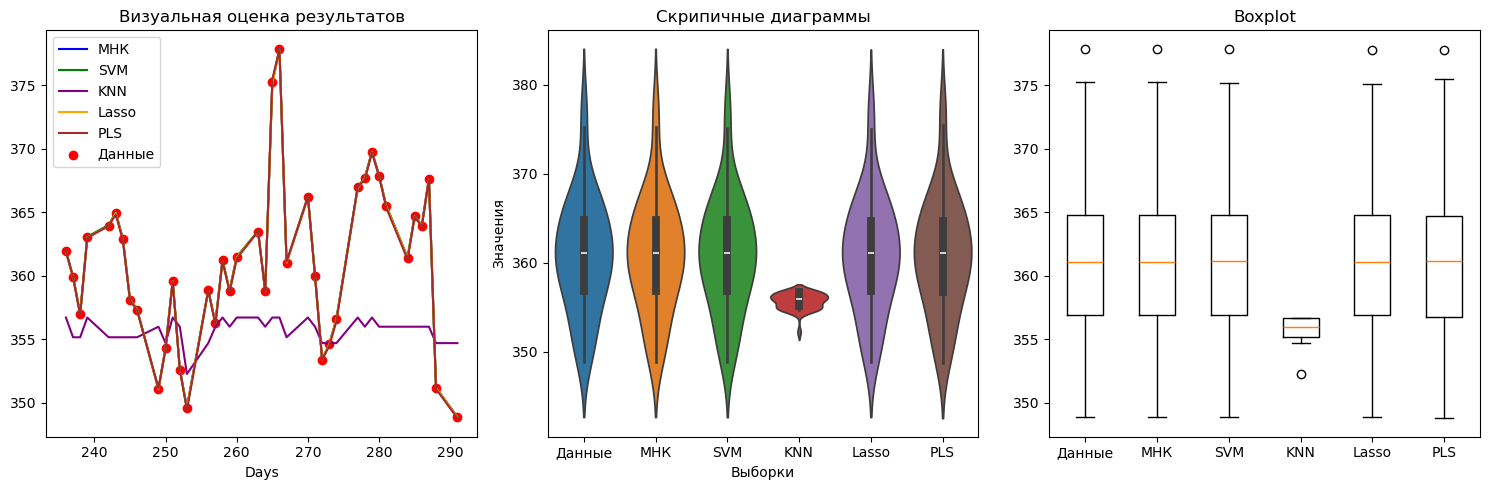

In [5]:

# Визуализация результатов всех моделей
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

# Первый подграфик: Линейные графики для всех моделей
axs[0].plot(x_test['Days'], res_mnk, label='МНК', color='blue')
axs[0].plot(x_test['Days'], res_svm, label='SVM', color='green')
axs[0].plot(x_test['Days'], res_knn, label='KNN', color='purple')
axs[0].plot(x_test['Days'], res_lasso, label='Lasso', color='orange')
axs[0].plot(x_test['Days'], res_pls, label='PLS', color='brown')
axs[0].scatter(x_test['Days'], y_test, color='red', label='Данные')
axs[0].set_title('Визуальная оценка результатов')
axs[0].legend()
axs[0].set_xlabel('Days')

# Второй подграфик: Скрипичные диаграммы для всех моделей
data = pd.DataFrame({
    'Данные': y_test,
    'МНК': res_mnk,
    'SVM': res_svm,
    'KNN': res_knn,
    'Lasso': res_lasso,
    'PLS': res_pls
})

sns.violinplot(data=data, ax=axs[1])
axs[1].set_title('Скрипичные диаграммы')
axs[1].set_ylabel('Значения')
axs[1].set_xlabel('Выборки')

# Третий подграфик: Boxplot для всех моделей
axs[2].boxplot([y_test, res_mnk, res_svm, res_knn, res_lasso, res_pls])
axs[2].set_title('Boxplot')
axs[2].set_xticklabels(['Данные', 'МНК', 'SVM', 'KNN', 'Lasso', 'PLS'])

plt.tight_layout()  # Автоматическое выравнивание подграфиков
plt.show()


По графиками мы можем сравнить характеристики разброса значений: медианные значения практически совпадают, границы квартилей чуть сдвинуты (*что это значит? подумайте!*), "границы усов" — границы статистически значимой выборки, тоже несколько сдвинуты, разброс значений по прогнозу чуть больше, чем реальные значения. Выбросов не наблюдается.

#### Статистическая оценка
Для выполнения анализа с использованием статистических критериев согласия в Python, вы можете воспользоваться библиотекой scipy.

In [6]:
from scipy.stats import chisquare

# Приведение y_test к той же сумме для каждой модели
y_test_normalized_mnk = y_test / np.sum(y_test) * np.sum(res_mnk)
y_test_normalized_svm = y_test / np.sum(y_test) * np.sum(res_svm)
y_test_normalized_knn = y_test / np.sum(y_test) * np.sum(res_knn)
y_test_normalized_lasso = y_test / np.sum(y_test) * np.sum(res_lasso)
y_test_normalized_pls = y_test / np.sum(y_test) * np.sum(res_pls)

# Функция для проведения теста согласия Пирсона
def perform_chi_square_test(res_model, y_test_normalized, model_name):
    chi2_statistic, p_value = chisquare(f_obs=res_model, f_exp=y_test_normalized)
    print(f"\nМодель: {model_name}")
    print(f"Статистика хи-квадрат: {chi2_statistic}")
    print(f"p-value: {p_value}")
    
    alpha = 0.05
    if p_value < alpha:
        print(f"Нулевая гипотеза отвергается: {model_name} и y_test имеют разные распределения.")
    else:
        print(f"Нулевая гипотеза не отвергается: {model_name} и y_test имеют схожие распределения.")

# Проведение теста для каждой модели
perform_chi_square_test(res_mnk, y_test_normalized_mnk, 'МНК')
perform_chi_square_test(res_svm, y_test_normalized_svm, 'SVM')
perform_chi_square_test(res_knn, y_test_normalized_knn, 'KNN')
perform_chi_square_test(res_lasso, y_test_normalized_lasso, 'Lasso')
perform_chi_square_test(res_pls, y_test_normalized_pls, 'PLS')



Модель: МНК
Статистика хи-квадрат: 0.0
p-value: 1.0
Нулевая гипотеза не отвергается: МНК и y_test имеют схожие распределения.

Модель: SVM
Статистика хи-квадрат: 9.500544314595923e-05
p-value: 1.0
Нулевая гипотеза не отвергается: SVM и y_test имеют схожие распределения.

Модель: KNN
Статистика хи-квадрат: 3.7079756410596767
p-value: 0.9999999999999462
Нулевая гипотеза не отвергается: KNN и y_test имеют схожие распределения.

Модель: Lasso
Статистика хи-квадрат: 6.381824160874778e-05
p-value: 1.0
Нулевая гипотеза не отвергается: Lasso и y_test имеют схожие распределения.

Модель: PLS
Статистика хи-квадрат: 0.0007779737876721505
p-value: 1.0
Нулевая гипотеза не отвергается: PLS и y_test имеют схожие распределения.


In [7]:
from scipy import stats

# Функция для выполнения F-теста и интерпретации результатов
def perform_f_test(res_model, model_name):
    f_statistic, p_value = stats.f_oneway(res_model, y_test)
    print(f"\nМодель: {model_name}")
    print(f"Статистика F: {f_statistic}")
    print(f"P-значение: {p_value}")
    
    alpha = 0.05
    if p_value < alpha:
        print(f"Нулевая гипотеза отвергается: между выборками ({model_name} и y_test) есть значимые различия.")
    else:
        print(f"Нулевая гипотеза не отвергается: различия между выборками ({model_name} и y_test) не являются значимыми.")

# Проведение F-теста для всех моделей
perform_f_test(res_mnk, 'МНК')
perform_f_test(res_svm, 'SVM')
perform_f_test(res_knn, 'KNN')
perform_f_test(res_lasso, 'Lasso')
perform_f_test(res_pls, 'PLS')



Модель: МНК
Статистика F: 0.0
P-значение: 1.0
Нулевая гипотеза не отвергается: различия между выборками (МНК и y_test) не являются значимыми.

Модель: SVM
Статистика F: 0.00018654349009316614
P-значение: 0.9891376322072858
Нулевая гипотеза не отвергается: различия между выборками (SVM и y_test) не являются значимыми.

Модель: KNN
Статистика F: 25.30307186647428
P-значение: 3.0608889042769927e-06
Нулевая гипотеза отвергается: между выборками (KNN и y_test) есть значимые различия.

Модель: Lasso
Статистика F: 0.00022429712298732628
P-значение: 0.9880891285199122
Нулевая гипотеза не отвергается: различия между выборками (Lasso и y_test) не являются значимыми.

Модель: PLS
Статистика F: 0.0013009011185675364
P-значение: 0.971320279606903
Нулевая гипотеза не отвергается: различия между выборками (PLS и y_test) не являются значимыми.


In [8]:
from scipy import stats

# Функция для выполнения t-теста и интерпретации результатов
def perform_t_test(y_test, res_model, model_name):
    t_statistic, p_value = stats.ttest_rel(y_test, res_model)
    print(f"\nМодель: {model_name}")
    print(f"Результат t-теста: {t_statistic}")
    print(f"P-значение: {p_value}")
    
    alpha = 0.05
    if p_value < alpha:
        print(f"Нулевая гипотеза отвергается: средние значения ({model_name} и y_test) различаются значимо.")
    else:
        print(f"Нулевая гипотеза не отвергается: средние значения ({model_name} и y_test) не имеют значимых различий.")

# Проведение t-теста для каждой модели
perform_t_test(y_test, res_mnk, 'МНК')
perform_t_test(y_test, res_svm, 'SVM')
perform_t_test(y_test, res_knn, 'KNN')
perform_t_test(y_test, res_lasso, 'Lasso')
perform_t_test(y_test, res_pls, 'PLS')



Модель: МНК
Результат t-теста: nan
P-значение: nan
Нулевая гипотеза не отвергается: средние значения (МНК и y_test) не имеют значимых различий.

Модель: SVM
Результат t-теста: -4.2044367027896765
P-значение: 0.00014789788744768784
Нулевая гипотеза отвергается: средние значения (SVM и y_test) различаются значимо.

Модель: KNN
Результат t-теста: 5.54594041425933
P-значение: 2.2111703050265823e-06
Нулевая гипотеза отвергается: средние значения (KNN и y_test) различаются значимо.

Модель: Lasso
Результат t-теста: 5.52287313716458
P-значение: 2.3800806595105327e-06
Нулевая гипотеза отвергается: средние значения (Lasso и y_test) различаются значимо.

Модель: PLS
Результат t-теста: 3.890343963555738
P-значение: 0.00037955031724486404
Нулевая гипотеза отвергается: средние значения (PLS и y_test) различаются значимо.


### Метрики

In [11]:
# для практики, давайте посчитаем руками

def regression_error_metrics(model, x_train, y_train, X_test, y_test, model_name=''):
    model.fit(x_train, y_train)
    y_pred = model.predict(X_test)
    n = len(y_test)

    MSE = (1/n) * np.sum((y_test - y_pred)**2)
    RMSE = MSE**0.5
    R2 = 1 - (np.sum((y_test - y_pred)**2))/(np.sum((y_test - np.mean(y_test))**2))
    MAE = (1/n) * np.sum(abs(y_test - y_pred))
    MAPE = (1/n) *  np.sum(abs((y_test - y_pred)/y_test))

    model_error_metrics = {
        'MSE': MSE,
        'RMSE': RMSE,
        'R2': R2,
        'MAE': MAE,
        'MAPE': MAPE}

    result = pd.DataFrame({
        'MSE': MSE,
        'RMSE': RMSE,
        'R2': R2,
        'MAE': MAE,
        'MAPE': "{:.3%}".format(MAPE)},
        index=[model_name])

    return model_error_metrics, result

_, result = regression_error_metrics(model, x_train, y_train, x_test, y_test, model_name='Least Squares')

result

,MSE,RMSE,R2,MAE,MAPE
Least Squares,0.0,0.0,1.0,0.0,0.000%


КОНЕЧНО, можно и встроенными в sklearn метриками

https://scikit-learn.org/stable/modules/model_evaluation.html

In [12]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error

MSE = mean_squared_error(y_test, res_mnk)
RMSE = MSE**0.5
R2 = r2_score(y_test, res_mnk)
MAE = mean_absolute_error(y_test, res_mnk)
MAPE = mean_absolute_percentage_error(y_test, res_mnk)
print(f"{MSE:.2f}, {RMSE:.2f}, {R2:.2f}, {MAE:.2f}, {MAPE:.3%}")

0.00, 0.00, 1.00, 0.00, 0.000%


### Интерпретация результатов

...

Ваша задача применить все описанные выше измерения ко всем моделям, построенным после семинара 5 и сделать вывод о качестве предсказаний.


Для дополнительных баллов можно использовать тесты:

#### Критерии для проверки нормальности распределения
- Критерий Мизеса
- Критерий Андерсона-Дарлинга
- Критерий Шапиро-Франсиа
- Критерий Лилифорса

#### Критерии проверки однородности выборок
- Критерий Вилкоксона

#### Критреии сравнения масштаба
- Критерий Ансари-Брэдли
- Критерий Муда
